In [1]:
                               # K-MEANS ,CLUSTERING PROGRAMM
#Q3:Hotel Recommendation System: Hotel Recommendation System: Build a hotel recommendation system by clustering hotels based on 
#their amenities, user ratings, and location. Procedure: Apply K-means on hotel features, user reviews, and location data
#to group similar hotels and make personalized recommendations. Domain: Travel and Hospitality Dataset Link

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Hotel_details.csv")
df

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108043,154449,1771620,Hotel Stadt Tuttlingen,Donaustrasse 30,Tuttlingen,Germany,78532.0,Hotels,3,47.985364,8.817228,2,http://www.booking.com/hotel/de/stadt-tuttling...,EUR
108044,154450,1771626,Hotel Beroe,15 Yasen Str.,Sveti Vlas,Bulgaria,8256.0,Hotels,3,42.710919,27.763325,2,http://www.booking.com/hotel/bg/beroe.en-gb.html,BGN
108045,154451,177163,Hotel Rothmans,14 Ohrid Str.,Bansko,Bulgaria,2770.0,Hotels,3,41.837379,23.492391,2,http://www.booking.com/hotel/bg/rothmans-bansk...,BGN
108046,154452,177164,Boutique Suites Rainbow 4,Cacao Beach,Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674317,27.704325,2,https://www.booking.com/hotel/bg/rainbow-4-bou...,BGN


In [3]:
df.shape

(108048, 14)

In [4]:
df.head(10)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
5,46411,1771733,Boutique Hotel Three Lilies,Narodni 3,Frantiskovy Lazne,Czech Republic,NaN,Hotels,4,50.118496,12.349790,2,http://www.booking.com/hotel/cz/three-lilies.e...,EUR
6,46412,177175,MPM Hotel Sport,"100, Pirin Str",Bansko,Bulgaria,2770.0,Hotels,4,41.824789,23.477644,2,http://www.booking.com/hotel/bg/sport.en-gb.html,BGN
7,46413,177176,Family Hotel Santo Bansko,6 St.Ivan Rilski Str,Bansko,Bulgaria,2770.0,Hotels,3,41.829603,23.481450,2,http://www.booking.com/hotel/bg/santo-bansko.e...,BGN
8,46414,177179,Villas Jagoda & Malina,Borovets,Borovets,Bulgaria,2010.0,Holiday parks,3,42.275284,23.618516,2,http://www.booking.com/hotel/bg/villa-settleme...,BGN
9,46415,177183,Hotel Silver,"10,Lozengrad",Sozopol,Bulgaria,8130.0,Hotels,3,42.417956,27.699371,2,http://www.booking.com/hotel/bg/silver-sozopol...,BGN


In [5]:
df.tail(6)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
108042,154448,177162,Hotel Marmotte,Hannigstrasse 47,Saas-Fee,Switzerland,3906.0,Hotels,3,46.110538,7.928350,5,https://www.agoda.com/en-gb/hotel-marmotte/hot...,CHF
108043,154449,1771620,Hotel Stadt Tuttlingen,Donaustrasse 30,Tuttlingen,Germany,78532.0,Hotels,3,47.985364,8.817228,2,http://www.booking.com/hotel/de/stadt-tuttling...,EUR
108044,154450,1771626,Hotel Beroe,15 Yasen Str.,Sveti Vlas,Bulgaria,8256.0,Hotels,3,42.710919,27.763325,2,http://www.booking.com/hotel/bg/beroe.en-gb.html,BGN
108045,154451,177163,Hotel Rothmans,14 Ohrid Str.,Bansko,Bulgaria,2770.0,Hotels,3,41.837379,23.492391,2,http://www.booking.com/hotel/bg/rothmans-bansk...,BGN
108046,154452,177164,Boutique Suites Rainbow 4,Cacao Beach,Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674317,27.704325,2,https://www.booking.com/hotel/bg/rainbow-4-bou...,BGN
108047,154453,177165,Hotel Rainbow 2,"South Sunny beach, Cacao Beach",Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674830,27.705092,2,http://www.booking.com/hotel/bg/rainbow-2-caca...,BGN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [7]:
df.isna().sum()

id                  0
hotelid             0
hotelname           0
address          5093
city                0
country             0
zipcode         24562
propertytype        0
starrating          0
latitude            0
longitude           0
Source              0
url               111
curr                0
dtype: int64

In [8]:
a=df.dropna()
a

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
6,46412,177175,MPM Hotel Sport,"100, Pirin Str",Bansko,Bulgaria,2770.0,Hotels,4,41.824789,23.477644,2,http://www.booking.com/hotel/bg/sport.en-gb.html,BGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108043,154449,1771620,Hotel Stadt Tuttlingen,Donaustrasse 30,Tuttlingen,Germany,78532.0,Hotels,3,47.985364,8.817228,2,http://www.booking.com/hotel/de/stadt-tuttling...,EUR
108044,154450,1771626,Hotel Beroe,15 Yasen Str.,Sveti Vlas,Bulgaria,8256.0,Hotels,3,42.710919,27.763325,2,http://www.booking.com/hotel/bg/beroe.en-gb.html,BGN
108045,154451,177163,Hotel Rothmans,14 Ohrid Str.,Bansko,Bulgaria,2770.0,Hotels,3,41.837379,23.492391,2,http://www.booking.com/hotel/bg/rothmans-bansk...,BGN
108046,154452,177164,Boutique Suites Rainbow 4,Cacao Beach,Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674317,27.704325,2,https://www.booking.com/hotel/bg/rainbow-4-bou...,BGN


In [9]:
a.isna().sum()

id              0
hotelid         0
hotelname       0
address         0
city            0
country         0
zipcode         0
propertytype    0
starrating      0
latitude        0
longitude       0
Source          0
url             0
curr            0
dtype: int64

In [10]:
data= a[['address','starrating']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81151 entries, 0 to 108047
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     81151 non-null  object
 1   starrating  81151 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [11]:
from sklearn.cluster import KMeans

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.columns:
     if data[column].dtype == "object":
        data[column] = le.fit_transform(data[column])


C:\Users\Hi\AppData\Local\Temp\ipykernel_10140\261446501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])


In [13]:
from pandas.core.internals.blocks import NumericBlock
inertia = []
for number_of_cluster in range(1,8):
    kmean = KMeans(n_clusters = number_of_cluster)
    kmean.fit(data)
    inertia.append(kmean.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

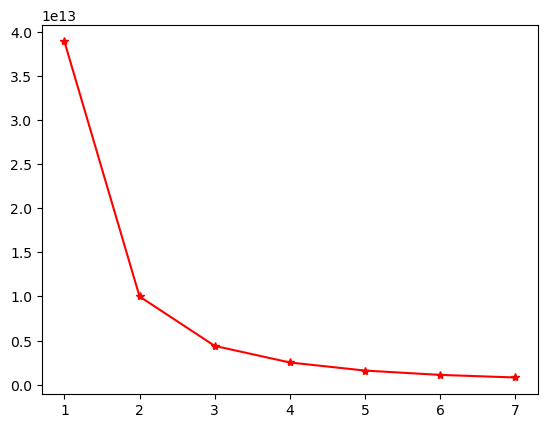

In [14]:
plt.plot(range(1,8),inertia,"*r-")


In [15]:
kmean = KMeans(n_clusters=4)
predict = kmean.fit_predict(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
predict

array([1, 0, 3, ..., 2, 0, 3])

In [17]:
x=a

Text(0, 0.5, 'starrating')

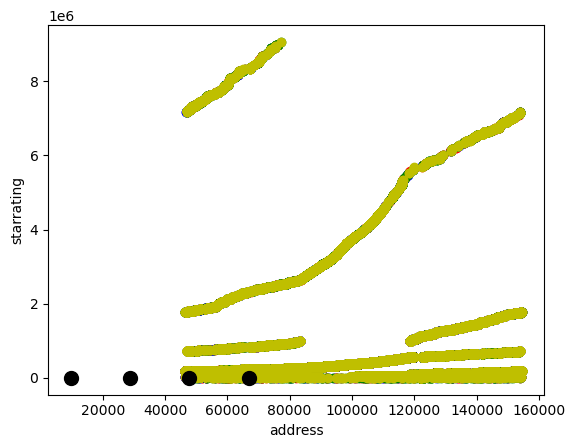

In [18]:
plt.scatter(x.iloc[predict == 0,0],x.iloc[predict == 0,1],c="r")
plt.scatter(x.iloc[predict == 1,0],x.iloc[predict == 1,1],c="b")
plt.scatter(x.iloc[predict == 2,0],x.iloc[predict == 2,1],c="g")
plt.scatter(x.iloc[predict == 3,0],x.iloc[predict == 3,1],c="y")
plt.scatter(x.iloc[predict == 4,0],x.iloc[predict == 4,1],c="purple")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s = 100, c="black")
plt.xlabel("address")
plt.ylabel("starrating")

In [19]:
#hierachical clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("Hotel_details.csv")
df

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108043,154449,1771620,Hotel Stadt Tuttlingen,Donaustrasse 30,Tuttlingen,Germany,78532.0,Hotels,3,47.985364,8.817228,2,http://www.booking.com/hotel/de/stadt-tuttling...,EUR
108044,154450,1771626,Hotel Beroe,15 Yasen Str.,Sveti Vlas,Bulgaria,8256.0,Hotels,3,42.710919,27.763325,2,http://www.booking.com/hotel/bg/beroe.en-gb.html,BGN
108045,154451,177163,Hotel Rothmans,14 Ohrid Str.,Bansko,Bulgaria,2770.0,Hotels,3,41.837379,23.492391,2,http://www.booking.com/hotel/bg/rothmans-bansk...,BGN
108046,154452,177164,Boutique Suites Rainbow 4,Cacao Beach,Sunny Beach,Bulgaria,8240.0,Hotels,3,42.674317,27.704325,2,https://www.booking.com/hotel/bg/rainbow-4-bou...,BGN


In [21]:
df.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [22]:
df.drop("id",axis=1,inplace=True)

In [23]:
df.drop("hotelid",axis=1,inplace=True)

In [24]:
df.drop("hotelname",axis=1,inplace=True)

In [25]:
df.drop("city",axis=1,inplace=True)

In [26]:
df.drop("country",axis=1,inplace=True)

In [27]:
df.drop("zipcode",axis=1,inplace=True)

In [28]:
df.drop("propertytype",axis=1,inplace=True)

In [29]:
df.drop(['address','longitude','Source'],axis=1,inplace=True)

In [30]:
df.drop(['url','curr'],axis=1,inplace=True)

In [31]:
df = df[df.columns[-2:]]

In [32]:
df

,starrating,latitude
0,4,43.440124
1,3,53.012329
2,3,46.477920
3,3,37.452316
4,3,46.682780
...,...,...
108043,3,47.985364
108044,3,42.710919
108045,3,41.837379
108046,3,42.674317


In [33]:
df.isna().sum()

starrating    0
latitude      0
dtype: int64

In [34]:
df=df.iloc[:5000,:]

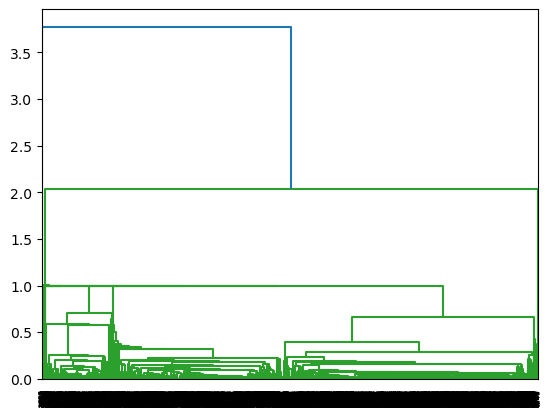

In [35]:
from scipy.cluster import hierarchy
d = hierarchy.dendrogram(hierarchy.linkage(df))

In [36]:
from sklearn.cluster import AgglomerativeClustering

cl = AgglomerativeClustering(n_clusters = 4)
pred = cl.fit_predict(df)

In [37]:
pred

array([0, 1, 2, ..., 0, 0, 0], dtype=int64)

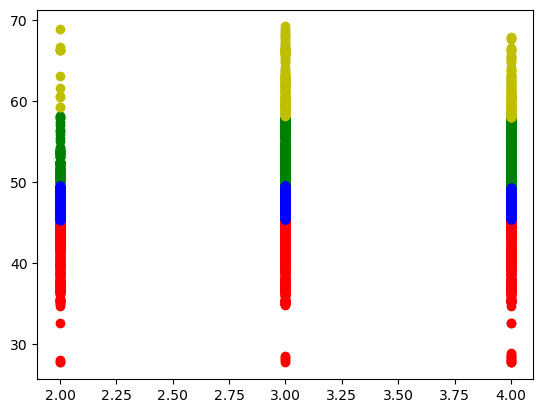

In [38]:
plt.scatter(df.iloc[pred==0,0],df.iloc[pred==0,1],c="r")
plt.scatter(df.iloc[pred==1,0],df.iloc[pred==1,1],c="g")
plt.scatter(df.iloc[pred==2,0],df.iloc[pred==2,1],c="b")
plt.scatter(df.iloc[pred==3,0],df.iloc[pred==3,1],c="y")